# 1. Was ist KI?

### 1.1. ChatGPT

ChatGPT: “KI steht für künstliche Intelligenz, ein Bereich der Informatik, der sich darauf konzentriert, Maschinen oder Computersysteme zu erschaffen, die Aufgaben ausführen können, die normalerweise menschliche Intelligenz erfordern. Dies umfasst eine breite Palette von Fähigkeiten wie Problemlösung, Spracherkennung, Lernen, Planung und Wahrnehmung.”

### 1.2. Einordnung

<img src="ki.svg">

# 2. Regel-basierte und statistische KI

### 2.1. Prinzip EVA

<img src="eva.svg">

In [1]:
def f(x):
    return x**2


f(3)

9

In [2]:
%load_ext autoreload
%autoreload 1
%aimport lib
import lib

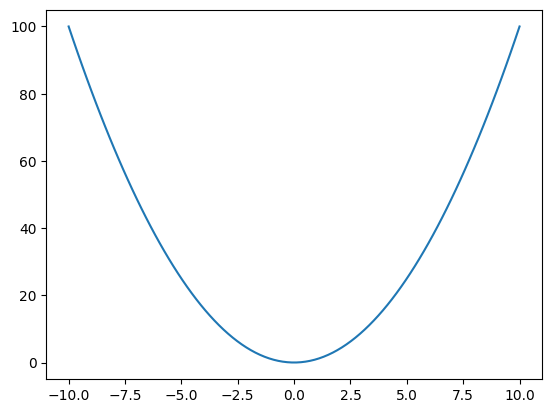

In [3]:
lib.plot_f(f)

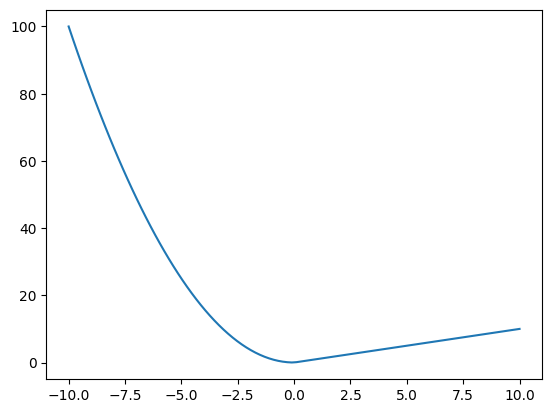

In [4]:
def f(x):
    if x > 0:
        return x
    return x**2


lib.plot_f(f)

### 2.2. Regel-basierte "KI"

In [5]:
def bewertung(text):
    if "nicht super" in text:
        return "negativ"
    if "super" in text:
        return "positiv"
    return "unsicher"


(
    bewertung("Der Film war super."),
    bewertung("Der Film war nicht super."),
    bewertung("Wer sagt, der Film sei nicht super, hat keine Ahnung!"),
)

('positiv', 'negativ', 'negativ')

### 2.3. Tensoren – Einzelwerte, Listen, Tabellen, ..., hochdimensionale Arrays

<img src="tensors.png" width="50%" />

In [6]:
import torch

a = torch.tensor(9)
a, a.shape

(tensor(9), torch.Size([]))

In [7]:
a = torch.tensor([9])
a, a.shape

(tensor([9]), torch.Size([1]))

In [8]:
a = torch.tensor([9, 10, 11, 12])
a, a.shape

(tensor([ 9, 10, 11, 12]), torch.Size([4]))

In [9]:
a = torch.tensor([[9, 10, 11, 12], [12, 13, 14, 15], [13, 14, 15, 16]])
a, a.shape

(tensor([[ 9, 10, 11, 12],
         [12, 13, 14, 15],
         [13, 14, 15, 16]]),
 torch.Size([3, 4]))

In [10]:
b = torch.stack([a, a * 2])
b, b.shape

(tensor([[[ 9, 10, 11, 12],
          [12, 13, 14, 15],
          [13, 14, 15, 16]],
 
         [[18, 20, 22, 24],
          [24, 26, 28, 30],
          [26, 28, 30, 32]]]),
 torch.Size([2, 3, 4]))

In [11]:
c = torch.stack([b, b + 5])
c, c.shape

(tensor([[[[ 9, 10, 11, 12],
           [12, 13, 14, 15],
           [13, 14, 15, 16]],
 
          [[18, 20, 22, 24],
           [24, 26, 28, 30],
           [26, 28, 30, 32]]],
 
 
         [[[14, 15, 16, 17],
           [17, 18, 19, 20],
           [18, 19, 20, 21]],
 
          [[23, 25, 27, 29],
           [29, 31, 33, 35],
           [31, 33, 35, 37]]]]),
 torch.Size([2, 2, 3, 4]))

### 2.4. Statistische KI zur Bilderkennung – MNIST, das "Hallo Welt" des ML

In [12]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()
(train_X, train_y, test_X, test_y) = (
    torch.tensor(train_X),
    torch.tensor(train_y),
    torch.tensor(test_X),
    torch.tensor(test_y),
)
train_X = train_X / 255
test_X = test_X / 255
train_X.shape, train_y.shape, test_X.shape, test_y.shape

2024-04-22 18:07:11.348820: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(torch.Size([60000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000, 28, 28]),
 torch.Size([10000]))

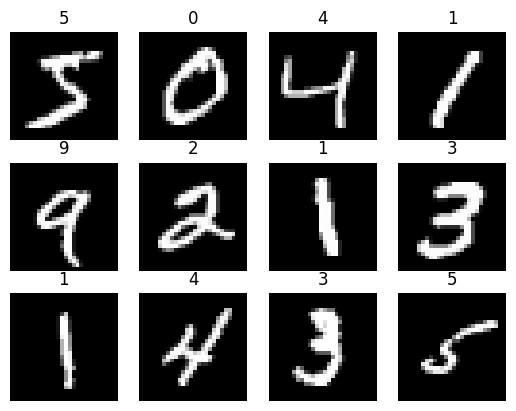

In [13]:
import matplotlib.pyplot as plt


def show(nr):
    plt.axis("off")
    plt.imshow(nr, cmap=plt.get_cmap("gray"))


for i in range(12):
    plt.subplot(3, 4, i + 1)
    show(train_X[i])
    plt.title(str(train_y[i].item()))

In [14]:
train_X[0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [15]:
train_y[:12]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=torch.uint8)

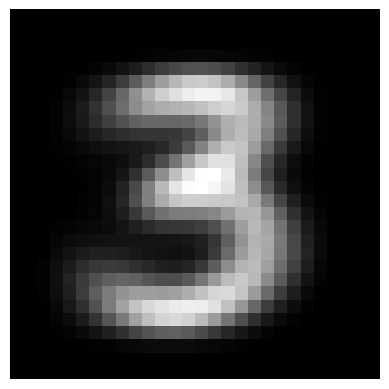

In [16]:
mean_3 = train_X[train_y == 3].mean(dim=0)
show(mean_3)

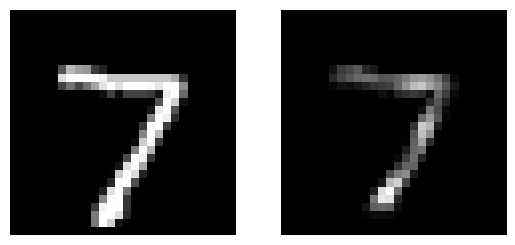

In [17]:
sample = 0
plt.subplot(1, 2, 1)
show(test_X[sample])
plt.subplot(1, 2, 2)
show(test_X[sample] * mean_3)

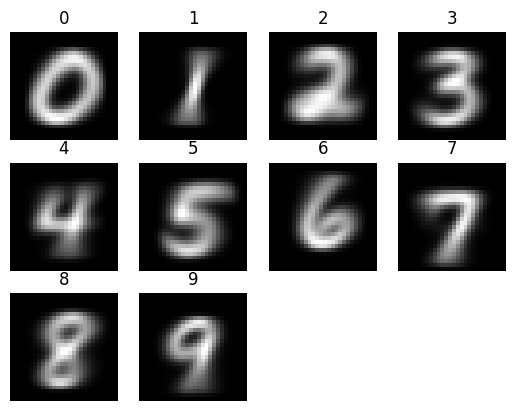

In [18]:
mean = torch.stack([train_X[train_y == i].mean(dim=0) for i in range(10)])
mean = mean / mean.sum(dim=(1, 2), keepdim=True)

for i in range(10):
    plt.subplot(3, 4, i + 1)
    show(mean[i])
    plt.title(str(i))

Text(0.5, 1.0, '7')

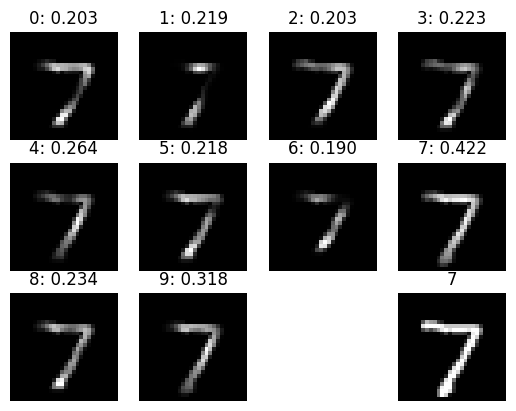

In [19]:
sample = 0
for i in range(10):
    plt.subplot(3, 4, i + 1)
    show((mean[i] * test_X[sample]))
    plt.title("%d: %.3f" % (i, torch.sum(mean[i] * test_X[sample])))
plt.subplot(3, 4, 12)
show(test_X[sample])
plt.title(str(test_y[sample].item()))

In [20]:
def classify_digit(sample):
    return (mean * sample).sum(axis=(1, 2))


classify_digit(test_X[3])

tensor([0.5901, 0.4270, 0.4551, 0.4708, 0.4630, 0.5062, 0.5547, 0.5247, 0.4628,
        0.5088])

In [21]:
test_X.shape

torch.Size([10000, 28, 28])

In [22]:
test_classification = torch.stack(
    [classify_digit(sample).argmax() for sample in test_X]
)
test_classification

tensor([7, 1, 1,  ..., 9, 1, 6])

In [23]:
test_y

tensor([7, 2, 1,  ..., 4, 5, 6], dtype=torch.uint8)

In [24]:
test_classification == test_y

tensor([ True, False,  True,  ..., False, False,  True])

In [25]:
accuracy = (test_classification == test_y).float().mean()
accuracy

tensor(0.6368)

# 3. Maschinelles Lernen: Parameter einer Funktion werden gemäß Trainingsdaten angepasst

### 3.1. Funktionen mit Parametern

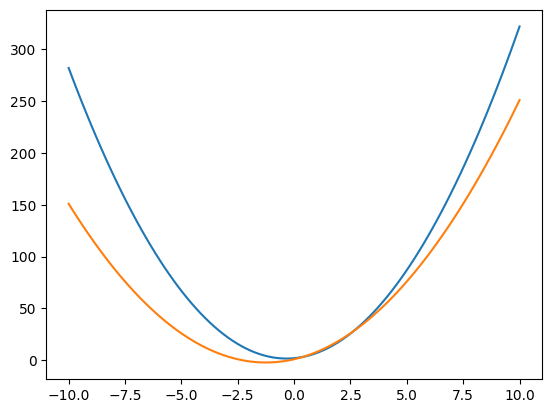

In [26]:
def f(x, a, b, c):
    return a * x**2 + b * x + c


def f1(x):
    return f(x, 3, 2, 2)


def f2(x):
    return f(x, 2, 5, 1)


lib.plot_f(f1)
lib.plot_f(f2)

### 3.2. Gradientenverfahren am Beispiel einer Funktion mit nur einem Parameter

Anzahl orangene Punkte: 11


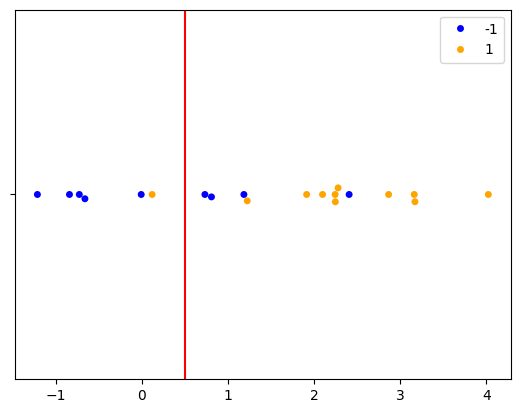

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

torch.manual_seed(1)
n = 20
y = torch.randint(0, 2, (n,))
y[y == 0] = -1
X = torch.randn(n)
X[y == 1] += 2
graph = sns.swarmplot(x=X[:].numpy(), hue=y.numpy(), palette={-1: "blue", 1: "orange"})
graph.axvline(x=0.5, color="red")
print("Anzahl orangene Punkte: %d" % (y == 1).sum())

In [28]:
X, y

(tensor([ 2.8657,  2.2444, -0.6629,  0.8073,  0.1179,  1.2235,  4.0242,  1.9135,
          2.0981, -1.2150,  0.7312,  3.1718,  2.4070,  2.2786,  2.2468,  1.1843,
         -0.7282,  3.1633, -0.0091, -0.8425]),
 tensor([ 1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1,
         -1, -1]))

In [29]:
def classify(X, threshold):
    return (X > threshold) * 2 - 1


classify(X, 0.5)

tensor([ 1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
        -1, -1])

In [30]:
classify(X, 0.5) != y

tensor([False, False, False,  True,  True, False, False, False, False, False,
         True, False,  True, False, False,  True, False, False, False, False])

In [31]:
(classify(X, 0.5) != y).sum()

tensor(5)

<Axes: >

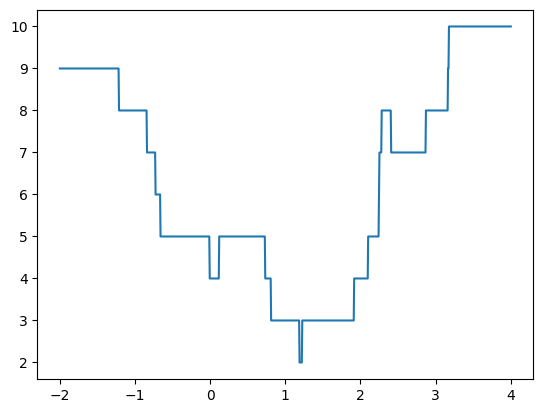

In [32]:
thresholds = torch.linspace(-2, 4, 1000)
errors = [(classify(X, threshold) != y).sum().item() for threshold in thresholds]
sns.lineplot(x=thresholds.numpy(), y=errors)

In [33]:
def classify(X, threshold):
    return X - threshold


def loss(y_pred, y):
    return torch.max(torch.tensor(0), -y * y_pred) ** 2


loss(classify(X, 0.5), y)

tensor([0.0000, 0.0000, 0.0000, 0.0944, 0.1460, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0534, 0.0000, 3.6366, 0.0000, 0.0000, 0.4683, 0.0000, 0.0000,
        0.0000, 0.0000])

<Axes: >

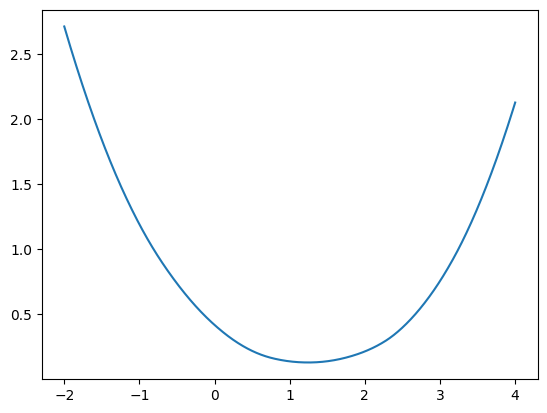

In [34]:
losses = [loss(classify(X, threshold), y).mean().item() for threshold in thresholds]
sns.lineplot(x=thresholds.numpy(), y=losses)

0.901168942451477

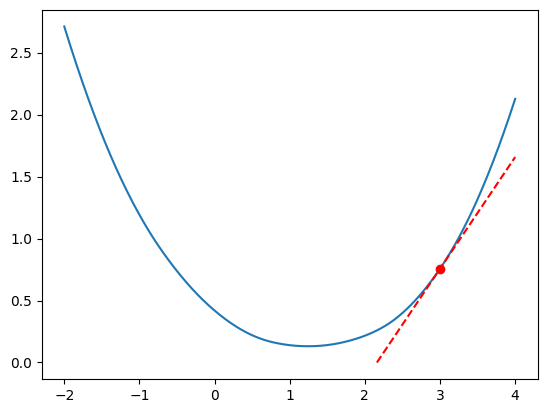

In [35]:
# loss = (-y * y_pred) ** 2
# loss = (-y * (X - threshold)) ** 2
# loss = y**2 * (X**2 - 2 * X * threshold + threshold**2)
# loss = y**2 * X**2 - y**2 * 2 * X * threshold + y**2 * threshold**2
# loss' = dloss/dthreshold = -y**2 * 2 * X + 2 * y**2 * threshold
# loss' = 2 * y**2 * (threshold - X)

def draw_with_slope(t):
    y_pred = classify(X, t)
    loss_t = loss(y_pred, y)
    slope = (loss_t.sign() * (2 * y**2 * (t - X))).mean()
    loss_t = loss_t.mean()

    sns.lineplot(x=thresholds.numpy(), y=losses)
    plt.plot(t, loss_t, "ro")

    def x_for_y(y):
        return (y - loss_t) / slope + t

    ts = torch.linspace(max(x_for_y(0), -2), min(x_for_y(12), 4), 100)
    slopes = slope * (ts - t) + loss_t
    plt.plot(ts, slopes, "r--")
    return slope.item() # type: ignore


draw_with_slope(3)

In [36]:
t = 3

(0.901168942451477, 2.098831057548523)

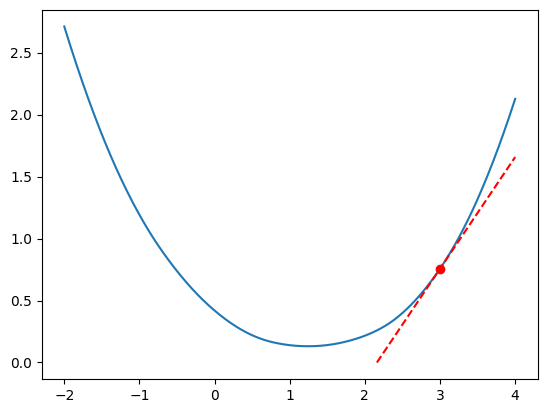

In [37]:
slope = draw_with_slope(t)
t = t - slope
slope, t

### 3.3. Ein einzelnes Neuron

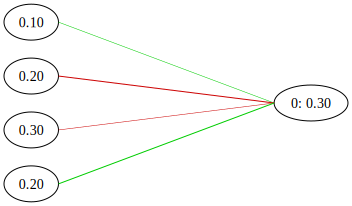

tensor([0.3000])

In [38]:
input = torch.tensor([0.1, 0.2, 0.3, 0.2])
W = torch.tensor([1.0, -2.0, -1.0, 2.0])
b = torch.tensor([0.5])

lib.plot_network(input, [[W.unsqueeze(0), b]])

In [39]:
input[0] * W[0] + input[1] * W[1] + input[2] * W[2] + input[3] * W[3] + b

tensor([0.3000])

In [40]:
W @ input + b

tensor([0.3000])

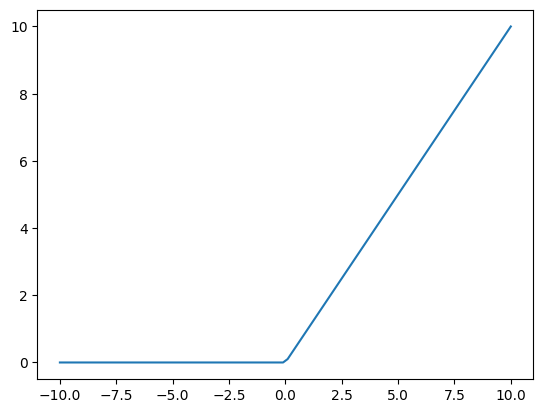

In [41]:
lib.plot_f(torch.relu)

### 3.4. Mehrere Neuronen

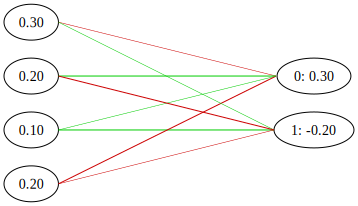

tensor([ 0.3000, -0.2000])

In [42]:
input = torch.tensor([0.1, 0.2, 0.3, 0.2])
W = torch.tensor([[1.0, -2.0, -1.0, 2.0], [2.0, -1.0, 1.0, -2.0]])
b = torch.tensor([0.5, -0.1])
lib.plot_network(input, [[W, b]])

### 3.5. Mehrere Schichten = Neuronales Netzwerk

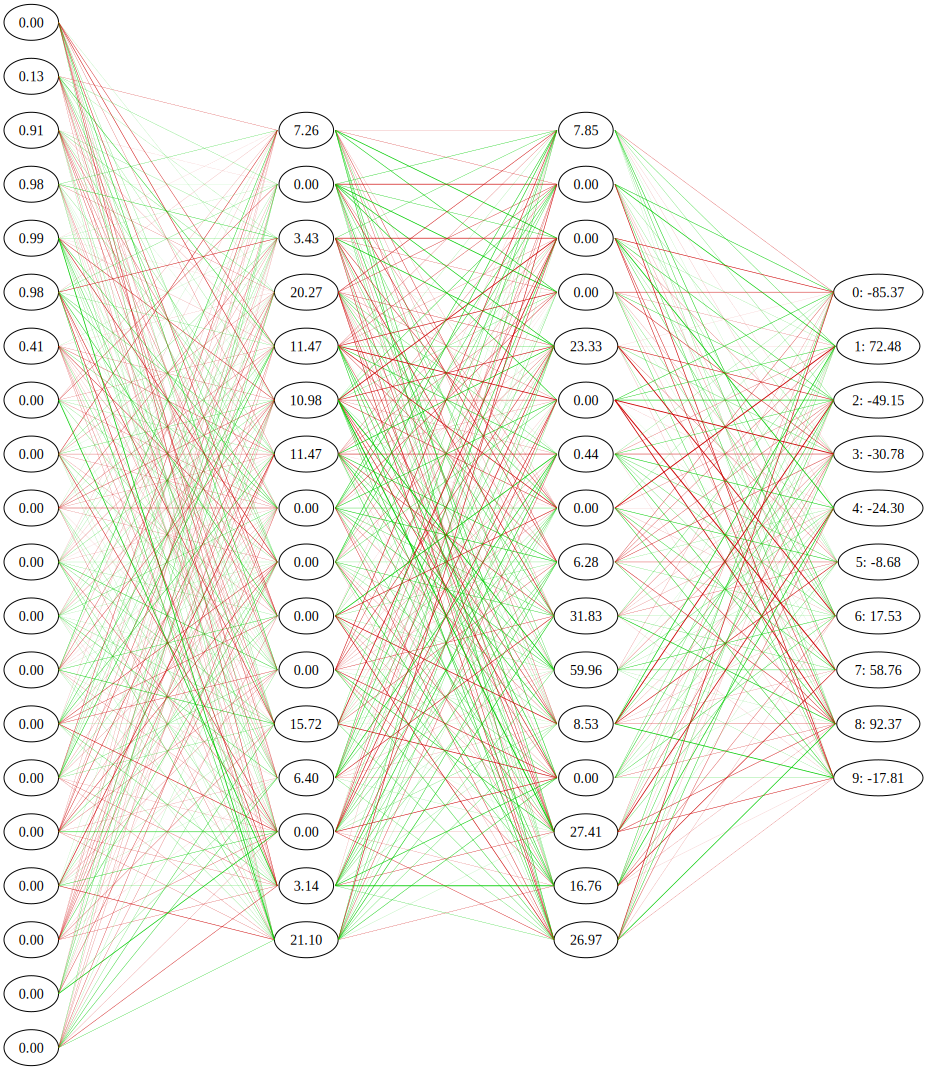

tensor([-85.3712,  72.4833, -49.1538, -30.7776, -24.3018,  -8.6812,  17.5298,
         58.7607,  92.3652, -17.8061])

In [43]:
W1 = torch.randn(16, 784)
b1 = torch.randn(16)
W2 = torch.randn(16, 16)
b2 = torch.randn(16)
W3 = torch.randn(10, 16)
b3 = torch.randn(10)

lib.plot_network(test_X[3], [[W1, b1], [W2, b2], [W3, b3]])

In [44]:
def forward(X):
    X = torch.relu(X @ W1.T + b1)
    X = torch.relu(X @ W2.T + b2)
    X = X @ W3.T + b3
    return X


output = forward(train_X.reshape([-1, 784]))
output

tensor([[ 18.6326, -23.9679,  43.3513,  ...,  14.1172,  56.5484,   9.8988],
        [-70.6151,  16.1627, -40.1619,  ..., 127.5842,  48.8893,  85.1511],
        [ -7.1364,   8.1756, -23.0285,  ..., -15.7324,   1.6723,  21.8930],
        ...,
        [ 24.8567, -36.7567, -15.4455,  ...,  23.6946,   8.9037,  60.3326],
        [-19.8587,   6.3896, -18.2434,  ...,   7.3638,  66.1577,  24.4489],
        [ 15.3227,  10.1721, -27.3382,  ..., -31.3847,   7.2528,  49.5409]])

In [45]:
import torch.nn.functional as F


def loss(y_pred, y):
    return F.cross_entropy(y_pred, y)


loss(output, train_y)

tensor(124.0598)

In [46]:
train_losses = []
test_losses = []
test_accuracies = []
test_xs = []
W1.requires_grad = True
b1.requires_grad = True
W2.requires_grad = True
b2.requires_grad = True
W3.requires_grad = True
b3.requires_grad = True

(2.3726062774658203, 2.3744029998779297, 0.10130000114440918)

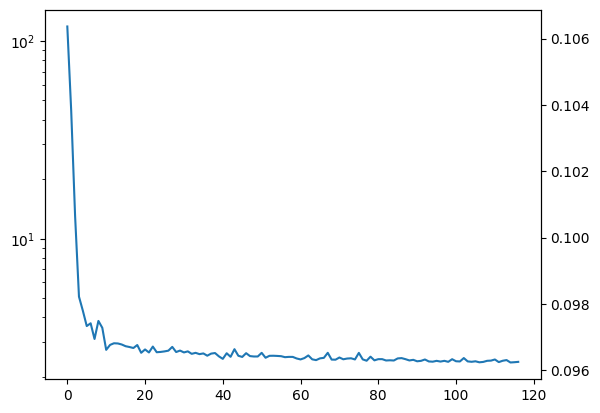

In [47]:
j = 0
k = 0
batch_size = 512
epochs = 1
for i in range(epochs * len(train_X) // batch_size):
    W1.grad = None
    b1.grad = None
    W2.grad = None
    b2.grad = None
    W3.grad = None
    b3.grad = None

    start = j * batch_size + k
    end = (j + 1) * batch_size + k
    j = j + 1
    if ((j + 1) * batch_size + k) > len(train_X):
        j = 0
        k += 1
        if k >= batch_size:
            k = 0
    loss_value = loss(
        forward(train_X[start:end].reshape([-1, 784])), train_y[start:end]
    )
    loss_value.backward()

    lr = 0.1
    with torch.no_grad():
        W1 -= lr * W1.grad  # type: ignore
        b1 -= lr * b1.grad  # type: ignore
        W2 -= lr * W2.grad  # type: ignore
        b2 -= lr * b2.grad  # type: ignore
        W3 -= lr * W3.grad  # type: ignore
        b3 -= lr * b3.grad  # type: ignore

    train_losses.append(loss_value.item())

test_xs.append(len(train_losses) - 1)
test_losses.append(loss(forward(test_X.reshape([-1, 784])), test_y).item())
test_accuracies.append(
    (forward(test_X.reshape([-1, 784])).argmax(dim=1) == test_y).float().mean().item()
)

sns.lineplot(x=range(len(train_losses)), y=train_losses).set(yscale="log")
sns.lineplot(x=test_xs, y=test_losses)
sns.lineplot(x=test_xs, y=test_accuracies, ax=plt.twinx(), color="red")  # type: ignore
train_losses[-1], test_losses[-1], test_accuracies[-1]

Korrekt: 2
0: 12.2%
1: 10.6%
2:  7.3%
3: 14.1%
4:  7.5%
5:  6.3%
6:  9.5%
7:  5.1%
8: 13.5%
9: 14.0%


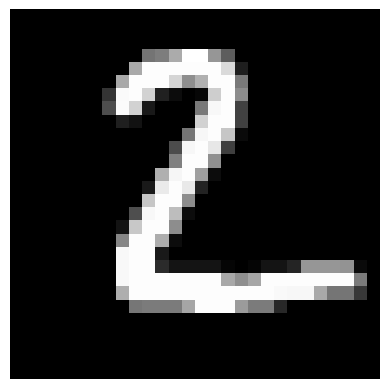

In [48]:
sample = 1
print("Korrekt: %d" % test_y[sample].item())
for i, v in enumerate(forward(test_X[sample].reshape([-1, 784])).softmax(dim=1)[0]):
    print("%d: %4.1f%%" % (i, (v.item() * 100)))
show(test_X[sample])

In [49]:
# Indices of misclassified samples.
(forward(test_X.reshape([-1, 784])).argmax(dim=1) != test_y).nonzero()[:10]

tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]])

### 3.6. Bonusmaterial: Angriff auf das Netzwerk

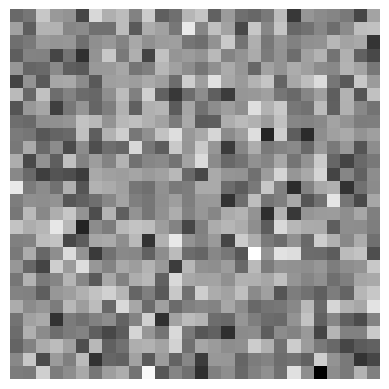

In [50]:
show(W1[3].reshape(28, 28).detach().numpy())

tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

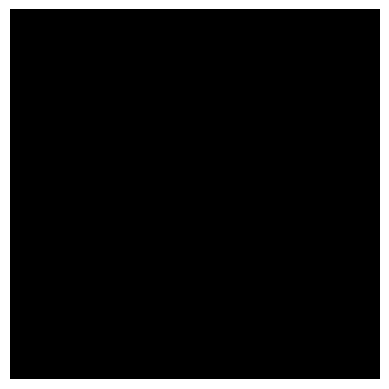

In [51]:
input = torch.zeros(784)
input.requires_grad = True
output = torch.zeros(10)
output[3] = 1
show(input.detach().reshape(28, 28))
output

In [52]:
losses = []
loss(forward(input), output)

tensor(3.1889, grad_fn=<DivBackward1>)

(tensor(1.9581, grad_fn=<DivBackward1>),
 tensor([ 0.3630,  0.2258, -0.1409,  0.5123, -0.1202, -0.3010,  0.1197, -0.5109,
          0.4643,  0.5029], grad_fn=<AddBackward0>),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

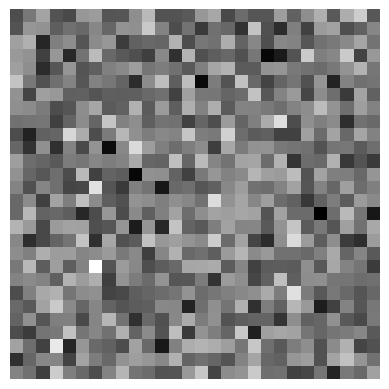

In [53]:
for i in range(1000):
    input.grad = None

    loss_value = loss(forward(input), output)
    loss_value.backward()
    losses.append(loss_value.item())

    lr = 0.0001
    with torch.no_grad():
        input -= lr * input.grad  # type: ignore

show(input.reshape(28, 28).detach().numpy())
loss(forward(input), output), forward(input), input.grad

(tensor([ 0.3630,  0.2258, -0.1409,  0.5123, -0.1202, -0.3010,  0.1197, -0.5109,
          0.4643,  0.5029], grad_fn=<AddBackward0>),
 tensor(3))

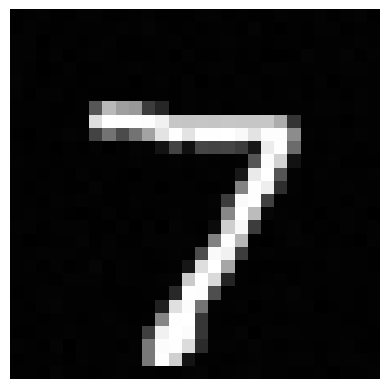

In [54]:
test_input = test_X[0] + 3 * input.reshape(28, 28).detach().numpy()
show(test_input)
output = forward(test_input.reshape(784))
output, output.argmax()

# 4. GPT = Generative Pretrained Transformer

- Generative = Es wird Text erzeugt.
- Pretrained = Das Netzwerk wird mit _viel_ Text trainiert, der nicht von Menschen vorverarbeitet wurde.
- Transfomer = Eine spezielle Netzwerkarchitektur.

In [55]:
from transformers import AutoTokenizer, AutoModelWithLMHead

tokenizer = AutoTokenizer.from_pretrained("dbmdz/german-gpt2")
model = AutoModelWithLMHead.from_pretrained("dbmdz/german-gpt2")

/Users/sadilek/dev/ki-vortrag/.venv/lib/python3.12/site-packages/transformers/models/auto/modeling_auto.py:1682: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


In [56]:
tokenizer.vocab_size

50265

In [57]:
tokenizer.vocab  # type: ignore

{'ĠHintergrÃ¼nde': 32601,
 'Marx': 31071,
 'ĠGER': 35900,
 'Ġviele': 1522,
 'ilton': 36319,
 'Ġkoreanischen': 43508,
 'XT': 37606,
 'Ġverstreut': 44486,
 'ergehen': 46888,
 'Ġabzielt': 47459,
 'abschluss': 12469,
 'nungszeiten': 19758,
 'schulden': 27314,
 'WER': 19341,
 'ĠThier': 36553,
 'Komplex': 38854,
 'Ġbr': 2727,
 'ĠSpekt': 40173,
 '""': 18745,
 'ĠReichstags': 30996,
 'ĠSpÃ¤ter': 9123,
 'Ġdamit': 1210,
 'ĠLloyd': 29259,
 'Ġgen': 780,
 'Ġmedizin': 7595,
 'Wander': 29446,
 'Ã¼cksichtigung': 10712,
 'gem': 3000,
 'EK': 13677,
 'ĠDum': 32787,
 'ĠReform': 6121,
 'Ġethn': 14992,
 'ĠComputern': 37358,
 'Ĵ': 245,
 'rÃ¤': 533,
 'ĠSamstag': 3338,
 'see': 3444,
 'igungs': 4881,
 'fÃ¤higen': 15137,
 'ĠVormittag': 23152,
 'jdi': 8012,
 'ĠâĢº': 25572,
 'acks': 27272,
 'sperrung': 35514,
 'ĠStraubing': 46004,
 'ĠStummfilm': 48828,
 'ester': 2118,
 'ĠAachen': 11145,
 'Ġeinlegen': 43306,
 'bewahrung': 21478,
 'ima': 3915,
 'bergen': 11667,
 'Ġtox': 36880,
 'Fahrrad': 44734,
 'tÃ¼rk': 36901,
 'ĠD

In [58]:
input = tokenizer("Die Katze springt", return_tensors="pt")
input

{'input_ids': tensor([[  425, 20295, 29373]]), 'attention_mask': tensor([[1, 1, 1]])}

In [59]:
lib.lookup_tokens(tokenizer, input.input_ids[0])

['Die', ' Katze', ' springt']

In [60]:
lib.lookup_tokens(tokenizer, tokenizer("dx1p2f1", return_tensors="pt").input_ids[0])

['d', 'x', '1', 'p', '2', 'f', '1']

In [61]:
input = tokenizer("Die Katze springt", return_tensors="pt")
output = model(**input)
output.logits[0, -1].shape

torch.Size([50265])

In [62]:
probs = output.logits[0, -1].softmax(-1)
probs

tensor([3.5660e-14, 5.8759e-15, 1.6793e-14,  ..., 3.7574e-12, 6.3415e-09,
        1.1059e-09], grad_fn=<SoftmaxBackward0>)

In [63]:
top_indices = probs.topk(5).indices
top_indices

tensor([375, 416, 412, 309, 298])

In [64]:
for i in top_indices:
    print(
        "%5d – %.1f%% – %s"
        % (
            i.item(),
            probs[i].item() * 100,
            lib.lookup_tokens(tokenizer, i.item()),
        )
    )

  375 – 9.8% – [' auf']
  416 – 6.5% – [' aus']
  412 – 6.4% – [' nicht']
  309 – 4.9% – [' in']
  298 – 4.0% – [' ein']


In [65]:
def print_next_words(text):
    input = tokenizer(text, return_tensors="pt")
    output = model(**input)
    probs = output.logits[0, -1].softmax(-1)
    top_indices = probs.topk(5).indices
    for i in top_indices:
        print(
            "%5d – %5.2f%% – %s"
            % (
                i.item(),
                probs[i].item() * 100,
                lib.lookup_tokens(tokenizer, i.item()),
            )
        )

In [66]:
print_next_words("Die Katze springt")

  375 –  9.78% – [' auf']
  416 –  6.53% – [' aus']
  412 –  6.40% – [' nicht']
  309 –  4.85% – [' in']
  298 –  4.04% – [' ein']


In [67]:
print_next_words("Das Auto springt")

  412 – 16.21% – [' nicht']
  416 –  6.35% – [' aus']
  364 –  5.38% – [' an']
  375 –  5.34% – [' auf']
  309 –  5.10% – [' in']


In [68]:
print_next_words("Der Mann ist")

  298 –  9.98% – [' ein']
  282 –  3.70% – [' der']
  309 –  3.53% – [' in']
 4434 –  3.02% – [' tot']
  997 –  2.74% – [' seit']


In [69]:
print_next_words("Der Frau ist")

  355 –  9.15% – [' das']
  444 –  9.01% – [' es']
 2599 –  5.59% – [' klar']
  286 –  5.31% – [' die']
 1777 –  5.24% – [' nichts']


# 5. Bonusmaterial: Embeddings: Worte im Raum

<img src="embedding.svg" />

In [70]:
embeddings = model.get_input_embeddings().weight
embeddings.shape

torch.Size([50265, 768])

In [71]:
def embedOf(word):
    ids = tokenizer(" " + word).input_ids
    assert len(ids) == 1
    return embeddings[ids[0]]


embedOf("König")

tensor([-1.0894e-01,  1.3706e-01, -8.9606e-03, -1.3364e-01,  6.0181e-02,
        -2.6103e-02,  1.5410e-01, -2.2259e-01, -6.9850e-02,  5.4221e-03,
         1.8005e-01,  2.1172e-01,  1.5789e-01, -4.6051e-03,  6.5917e-02,
        -1.3514e-01, -1.1843e-01,  2.4689e-01, -2.7904e-01,  1.8091e-01,
         2.0249e-01,  5.2944e-02,  4.6522e-02,  6.1340e-02,  1.4151e-02,
        -6.3117e-02,  9.0736e-03,  2.3725e-02, -7.3392e-03, -1.3947e-01,
        -3.0632e-01,  9.6496e-02,  2.8581e-01, -1.9215e-01, -1.7408e-01,
         1.0242e-01, -1.4820e-01, -7.0038e-02, -2.3582e-01, -1.6999e-01,
         5.4188e-02,  2.6616e-01,  1.7464e-01,  2.0543e-02,  1.7873e-01,
         7.1799e-03, -6.3579e-02, -3.0301e-01, -2.3149e-01, -4.9590e-01,
         6.1339e-02, -5.6592e-02,  9.0524e-02,  2.2030e-01,  6.9068e-02,
        -1.5382e-01, -9.6103e-02,  1.2103e-01,  5.8268e-02,  2.8029e-01,
         7.6060e-02, -3.6982e-02,  4.3174e-02, -1.5431e-01,  7.1667e-02,
        -3.5741e-02,  5.0047e-02,  9.1181e-02, -1.7

In [72]:
def print_most_similar(embedding):
    distances = embeddings @ embedding
    top_indices = distances.topk(5).indices
    print(top_indices)
    for i in top_indices:
        print(
            "%5d – %5.2f – %s"
            % (
                i.item(),
                distances[i].item(),
                lib.lookup_tokens(tokenizer, i.item()),
            )
        )


print_most_similar(embedOf("König"))

tensor([ 1663, 11760, 11249, 18660,  5899])
 1663 – 25.77 – [' König']
11760 – 23.44 – ['König']
11249 – 21.58 – [' Königin']
18660 – 21.52 – [' Könige']
 5899 – 20.45 – [' Königs']


In [73]:
print_most_similar(embedOf("König") - embedOf("Mann") + embedOf("Frau"))

tensor([11249,  1663, 11760, 28235,  1088])
11249 – 26.04 – [' Königin']
 1663 – 25.24 – [' König']
11760 – 23.78 – ['König']
28235 – 22.35 – [' Kronprin']
 1088 – 20.92 – [' Frau']


In [74]:
print_most_similar(embedOf("Berlin") - embedOf("Deutschland") + embedOf("Frankreich"))

tensor([23387,  3387,  1516,  2741, 42934])
23387 – 23.18 – ['Paris']
 3387 – 21.83 – [' Paris']
 1516 – 21.52 – [' Berlin']
 2741 – 20.90 – [' Frankreich']
42934 – 20.43 – ['Pots']


# 6. Meilensteine

- **2012**: AlexNet gewinnt ImageNet competition
- **2013**: Reinforcement Learning spielt Atari Spiele
- **2016**: AlphaGo gewinnt gegen Lee Sedol
- **Spracherkennung**: Übergang von mehrschrittiger Verarbeitung (Phonemerkennung zu Worterkennung) zu - Ende-zu-Ende NN ML
- **NLP**: Übergang von linguistischen Regeln zu NN ML
- **2017**: Transformers für Übersetzungen
- **2018**: BERT und GPT-1
- **2018 + 2020**: AlphaFold
- **2021**: DALL-E
- **2022**: ChatGPT launch
- **2023**: GPT-4


# 7. Ausblick

<img src="benchmarks.png" />

- KI wird bei immer mehr Aufgaben
  - so gut wie ein durchschnittlicher Mensch
  - besser als ein durchschnittlicher Mensch
  - besser als der beste Mensch
- Daniel Kahnemann: System 1 und System 2 Denken
- KI arbeitet im Moment hauptsächlich wie System 1
- System 2 als Heuristik on-top, meist Baumsuche
- Menschliches Gehirn: 100 Mrd. Neuronen verbunden mit 100 Billionen Synapsen
- GPT-4: Vermutet ~1 Billion Gewichte
- AGI (Artifical General Intelligence) in den nächsten 2 - 10 Jahren

# Graph code

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


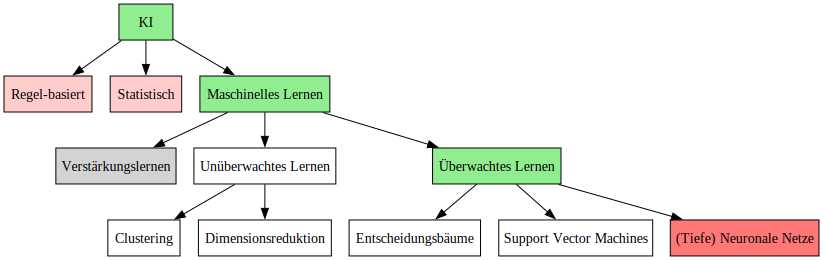

In [75]:
import graphviz
from IPython.display import SVG, display

dot = graphviz.Digraph()
dot.node_attr.update(shape="box")

dot.edge("KI", "Regel-basiert")
dot.edge("KI", "Statistisch")
dot.edge("KI", "Maschinelles Lernen")

dot.edge("Maschinelles Lernen", "Verstärkungslernen")
dot.edge("Maschinelles Lernen", "Unüberwachtes Lernen")
dot.edge("Maschinelles Lernen", "Überwachtes Lernen")

dot.edge("Unüberwachtes Lernen", "Clustering")
dot.edge("Unüberwachtes Lernen", "Dimensionsreduktion")

dot.edge("Überwachtes Lernen", "Entscheidungsbäume")
dot.edge("Überwachtes Lernen", "Support Vector Machines")
dot.edge("Überwachtes Lernen", "(Tiefe) Neuronale Netze")

dot.node("KI", fillcolor="lightgreen", style="filled")
dot.node("Regel-basiert", fillcolor="#fcc", style="filled")
dot.node("Statistisch", fillcolor="#fcc", style="filled")
dot.node("Maschinelles Lernen", fillcolor="lightgreen", style="filled")
dot.node("Verstärkungslernen", fillcolor="lightgray", style="filled")
dot.node("Überwachtes Lernen", fillcolor="lightgreen", style="filled")
dot.node("(Tiefe) Neuronale Netze", fillcolor="#f77", style="filled")

dot.render("ki", format="svg", cleanup=True)
display(SVG(filename="ki.svg"))

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


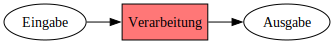

In [76]:
import graphviz
from IPython.display import SVG, display

dot = graphviz.Digraph()

dot.edge("Eingabe", "Verarbeitung")
dot.edge("Verarbeitung", "Ausgabe")

dot.node("Verarbeitung", fillcolor="#f77", style="filled", shape="box")

# from left to right
dot.graph_attr.update(rankdir="LR")

dot.render("eva", format="svg", cleanup=True)
display(SVG(filename="eva.svg"))

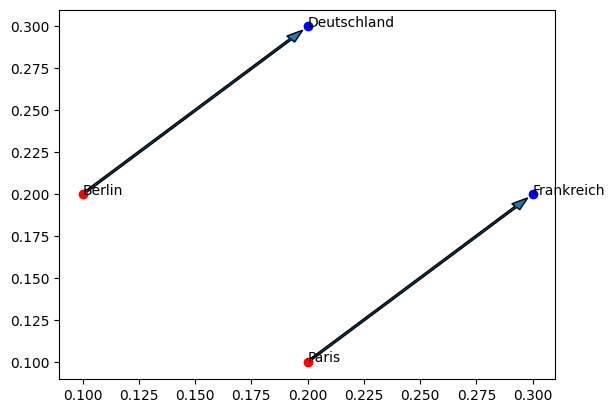

In [77]:
berlin = [0.1, 0.2]
deutschland = [0.2, 0.3]
paris = [0.2, 0.1]
frankreich = [0.3, 0.2]


def plot_dot(coord, label, color):
    plt.plot(coord[0], coord[1], color + "o")
    plt.text(coord[0], coord[1], label)


def plot_arrow(start, end, head_width=0.005):
    plt.arrow(
        start[0],
        start[1],
        end[0] - start[0] - head_width * 1.5,
        end[1] - start[1] - head_width * 1.5,
        head_width=head_width,
    )


plot_dot(berlin, "Berlin", "r")
plot_dot(deutschland, "Deutschland", "b")
plot_dot(paris, "Paris", "r")
plot_dot(frankreich, "Frankreich", "b")
plot_arrow(berlin, deutschland)
plot_arrow(paris, frankreich)

plt.savefig("embedding.svg")

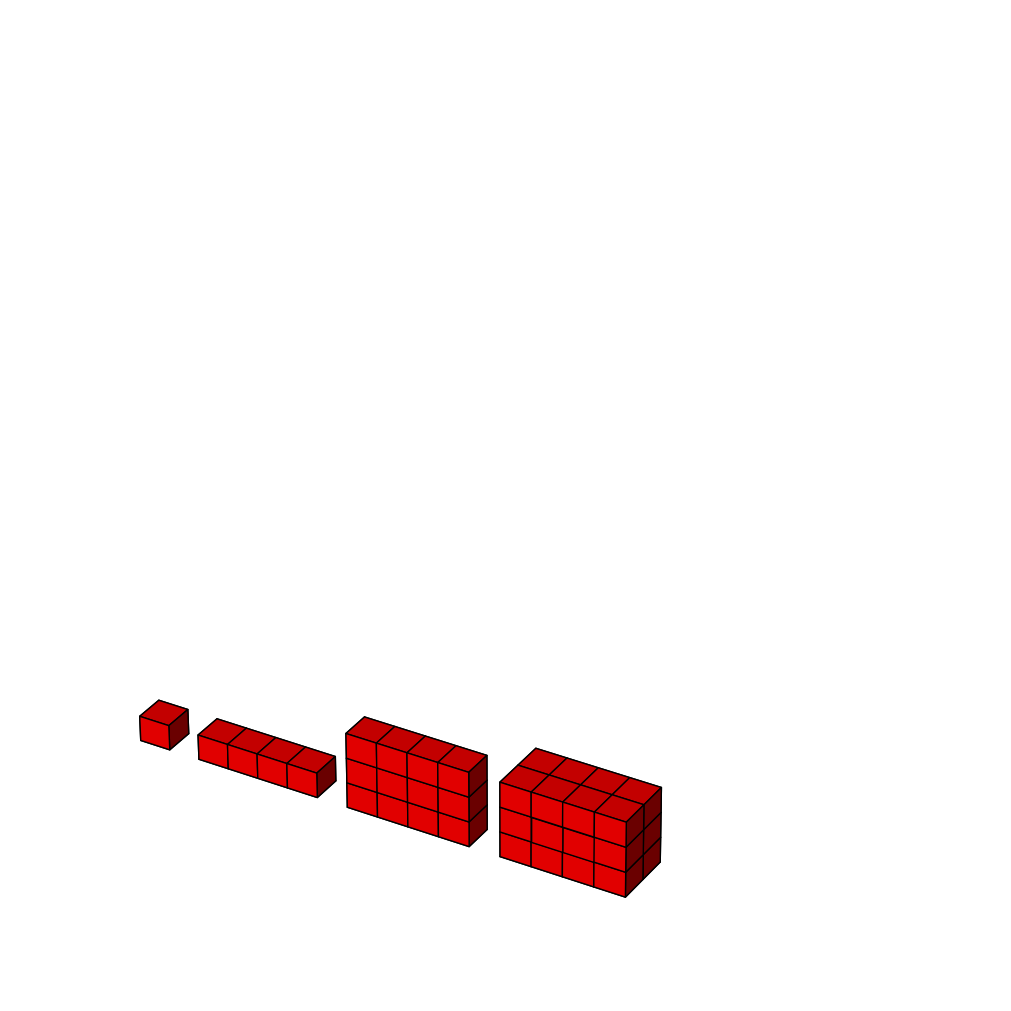

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

x, y, z = np.indices((16, 16, 16))
cubes = (
    (x < 1) & (y < 1) & (z < 1)
    | (x > 1) & (x < 6) & (y == 0) & (z == 0)
    | (x > 6) & (x < 11) & (y == 0) & (z < 3)
    | (x > 11) & (x < 16) & (y < 2) & (z < 3)
)
colors = np.empty(cubes.shape, dtype=object)
colors[cubes] = "red"

fig = plt.figure(figsize=(10, 10), constrained_layout=True)
ax = fig.add_subplot(projection="3d")
ax.set_axis_off()
ax.voxels(cubes, facecolors=colors, edgecolor="k")  # type: ignore
plt.show()

# Save screenshot manually to avoid too much whitespace around the plot.